Hierarchical clustering

total dataset

In [1]:
import pandas as pd

alexis_f=pd.read_csv('love_study_features_optimization_numerical.csv'

)
print(alexis_f)

      married / was married  couple  any relation  respondent gender  \
0                       0.0     0.0           1.0                  0   
1                       1.0     1.0           NaN                  1   
2                       1.0     1.0           NaN                  0   
3                       0.0     0.0           1.0                  1   
4                       1.0     1.0           NaN                  1   
...                     ...     ...           ...                ...   
3505                    1.0     1.0           NaN                  1   
3506                    NaN     1.0           NaN                  0   
3507                    1.0     1.0           NaN                  0   
3508                    NaN     1.0           NaN                  0   
3509                    NaN     1.0           NaN                  1   

      couple gender  interracial couple  respondent age  partner age  \
0               1.0                 NaN               2        

whole dataset

change to numeric not finished

In [3]:
alexis_f = alexis_f.astype(str)

# dummy_2017_full=dummy_2017.replace(NaN,'unknown')

print(alexis_f.head())

  married / was married couple any relation respondent gender couple gender  \
0                   0.0    0.0          1.0                 0           1.0   
1                   1.0    1.0          nan                 1           0.0   
2                   1.0    1.0          nan                 0           0.0   
3                   0.0    0.0          1.0                 1           2.0   
4                   1.0    1.0          nan                 1           0.0   

  interracial couple respondent age partner age education gap  \
0                nan              2         1.0           2.0   
1                nan              4         4.0           0.0   
2                nan              3         3.0           3.0   
3                nan              1         1.0           0.0   
4                nan              4         4.0           0.0   

  couple salary gap couple political stability meeting interface  \
0               1.0                        2.0               0.0  

In [4]:
dummy_2017_full=alexis_f.replace('nan',-2)

dummy_2017_full_copy=dummy_2017_full

print(dummy_2017_full)

     married / was married couple any relation respondent gender  \
0                      0.0    0.0          1.0                 0   
1                      1.0    1.0           -2                 1   
2                      1.0    1.0           -2                 0   
3                      0.0    0.0          1.0                 1   
4                      1.0    1.0           -2                 1   
...                    ...    ...          ...               ...   
3505                   1.0    1.0           -2                 1   
3506                    -2    1.0           -2                 0   
3507                   1.0    1.0           -2                 0   
3508                    -2    1.0           -2                 0   
3509                    -2    1.0           -2                 1   

     couple gender  interracial couple respondent age partner age  \
0              1.0                  -2              2         1.0   
1              0.0                  -2       

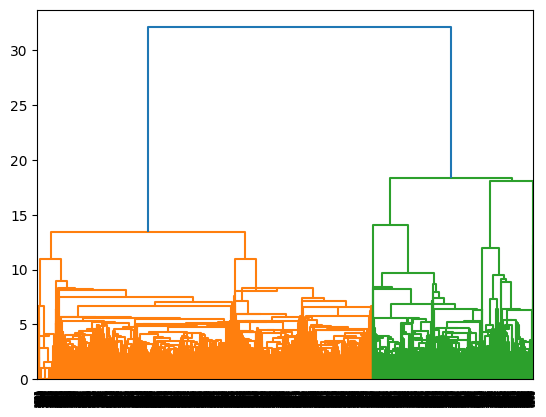

In [5]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from matplotlib import pyplot as plt

Z = linkage(dummy_2017_full,
method='centroid',
metric='euclidean')
dn = dendrogram(Z)
plt.show()

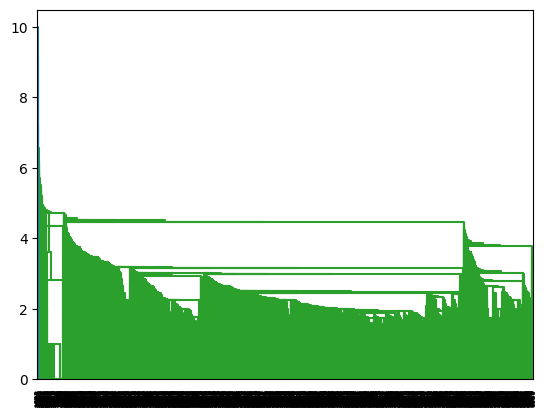

In [6]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from matplotlib import pyplot as plt

Z = linkage(dummy_2017_full,
method='single',
metric='euclidean')
dn = dendrogram(Z)
plt.show()

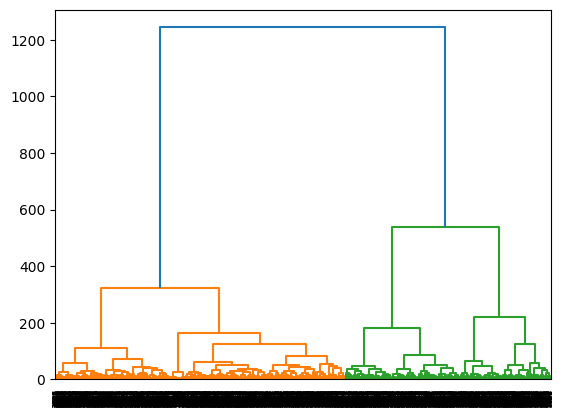

In [7]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from matplotlib import pyplot as plt

Z = linkage(dummy_2017_full,
method='ward',
metric='euclidean')
dn = dendrogram(Z)
plt.show()

In [8]:
from scipy.cluster.hierarchy import fcluster

h_clusters=fcluster(Z,3,criterion='maxclust')
h_clusters

array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

In [9]:
import pandas as pd

dummy_2017_full = dummy_2017_full_copy.reset_index()
clustersDf = pd.DataFrame(h_clusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([dummy_2017_full, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [10]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 3]

In [12]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [28]:
range_columns=combinedDf.columns
print(range_columns)

Index(['married / was married', 'couple', 'any relation', 'respondent gender',
       'couple gender', 'interracial couple', 'respondent age', 'partner age',
       'education gap', 'couple salary gap', 'couple political stability',
       'meeting interface', 'try app service', 'relation duration [year]',
       'relation quality', 'cluster_predicted'],
      dtype='object')


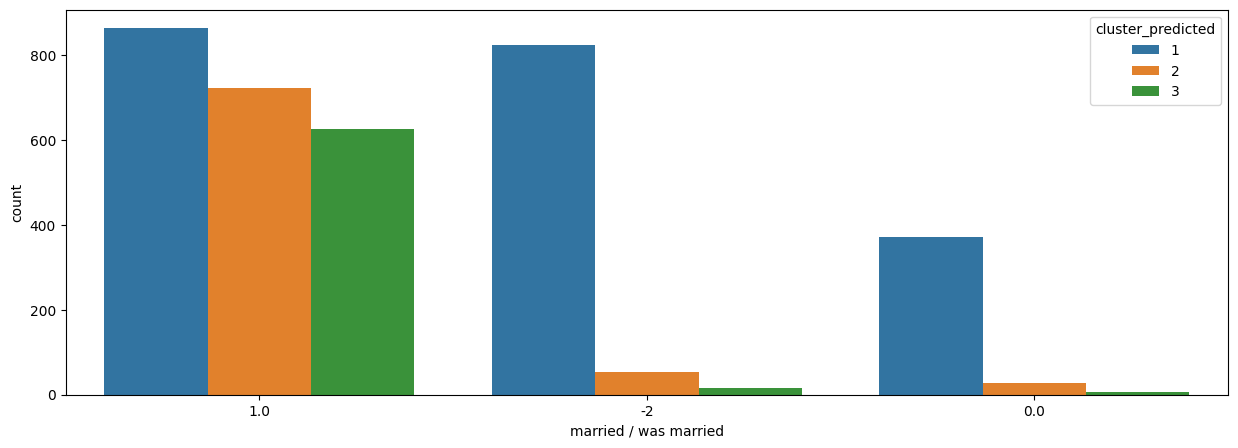

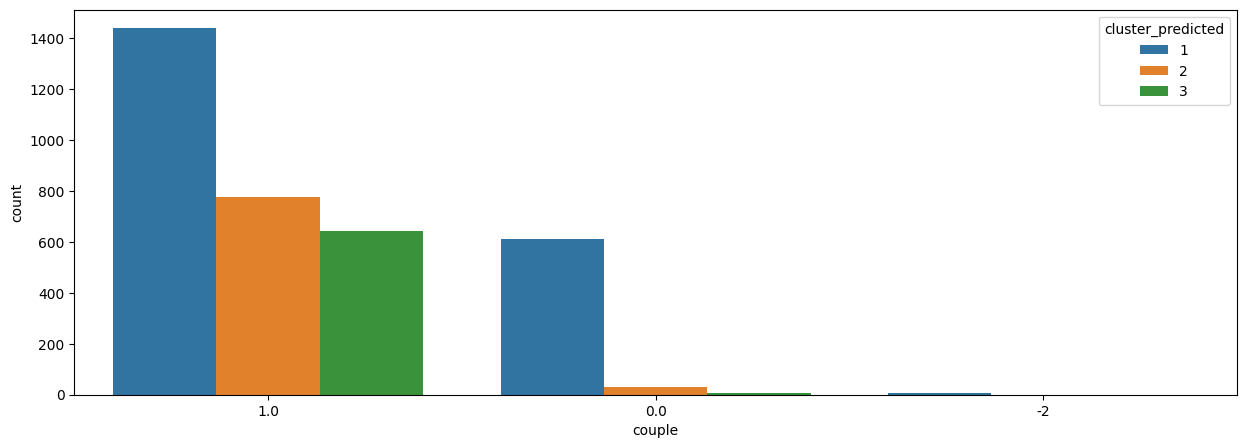

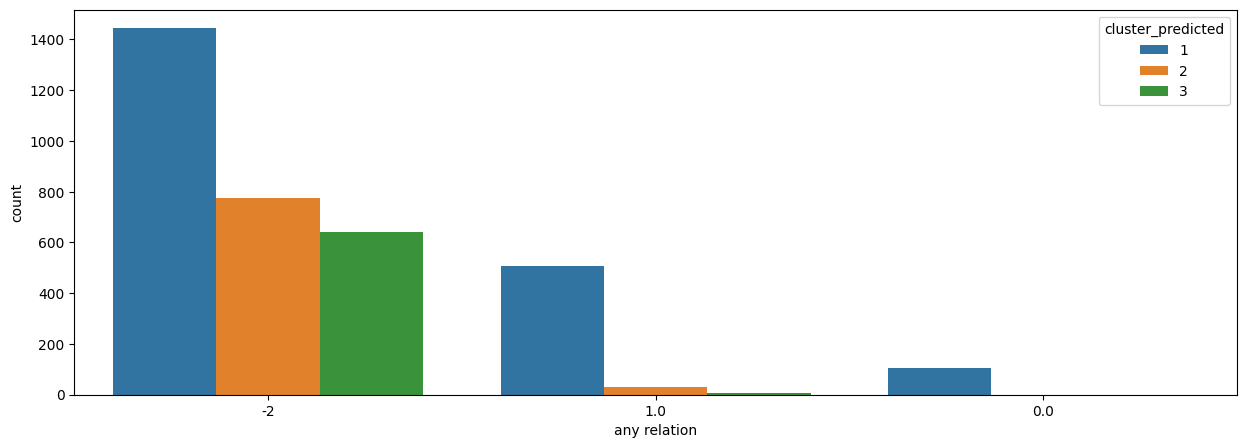

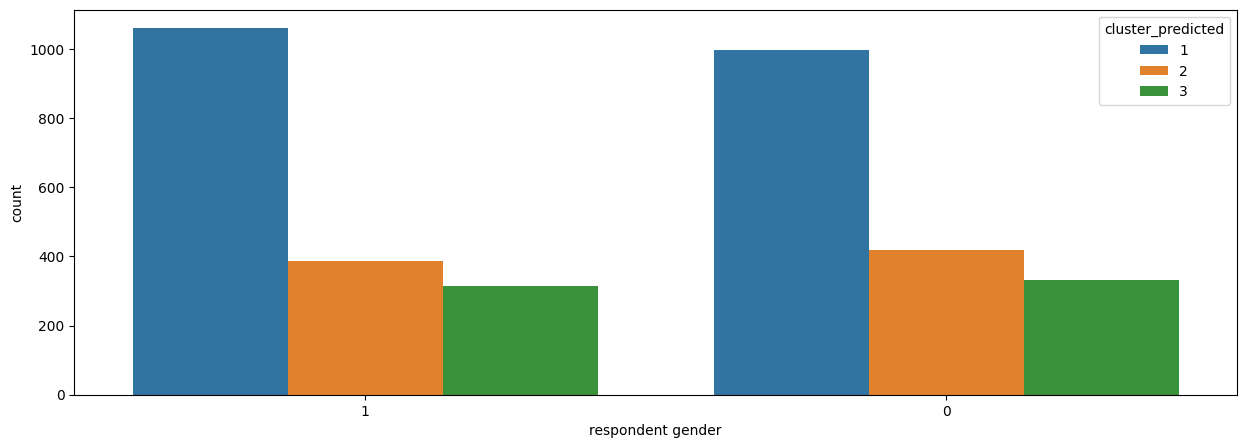

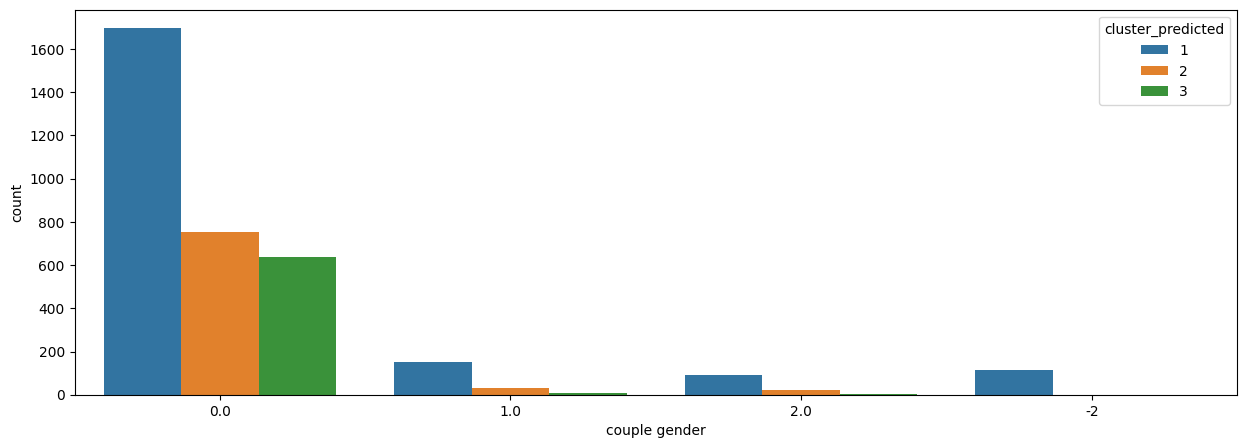

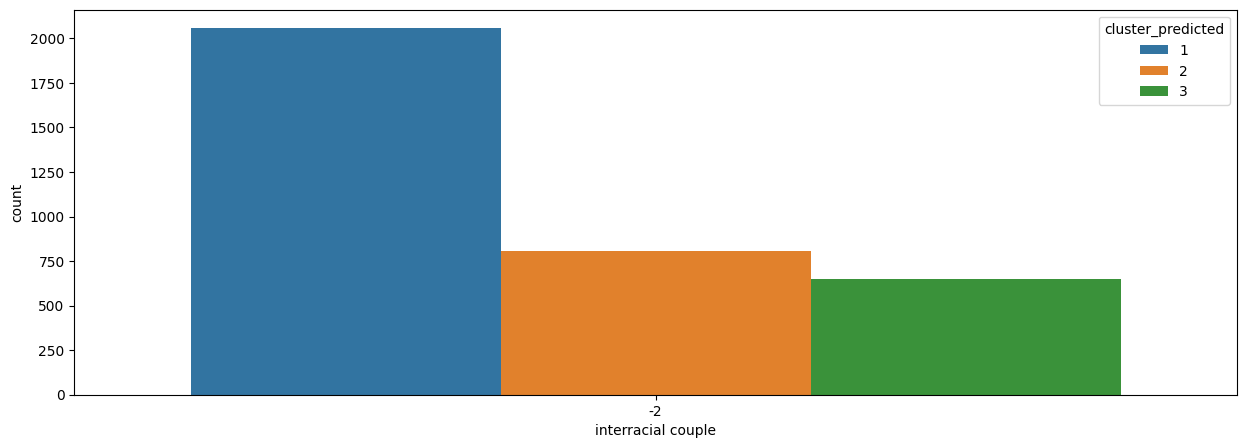

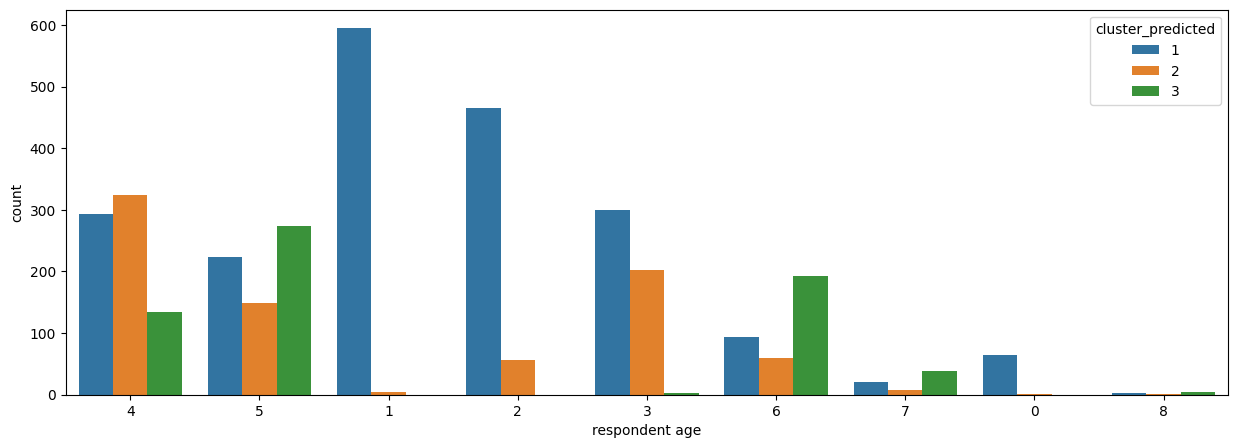

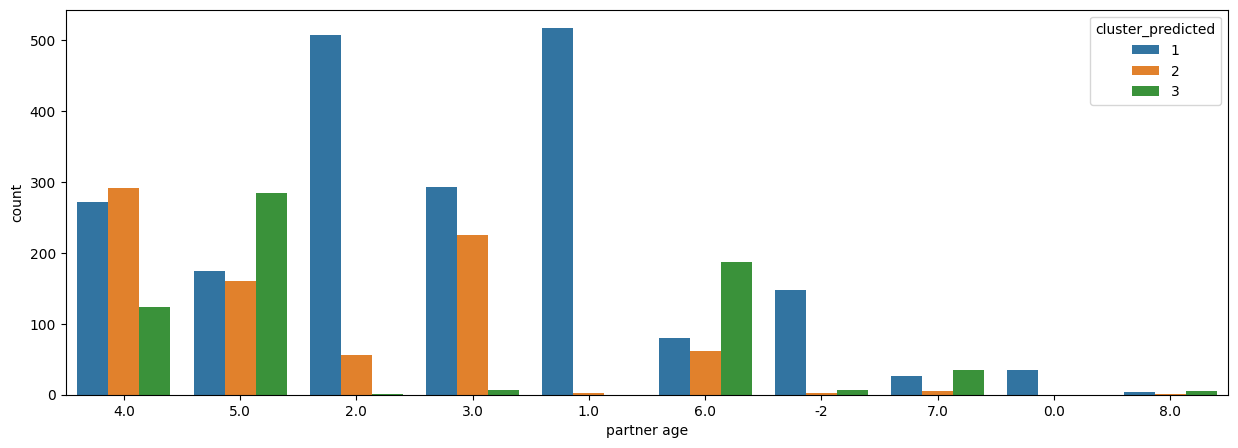

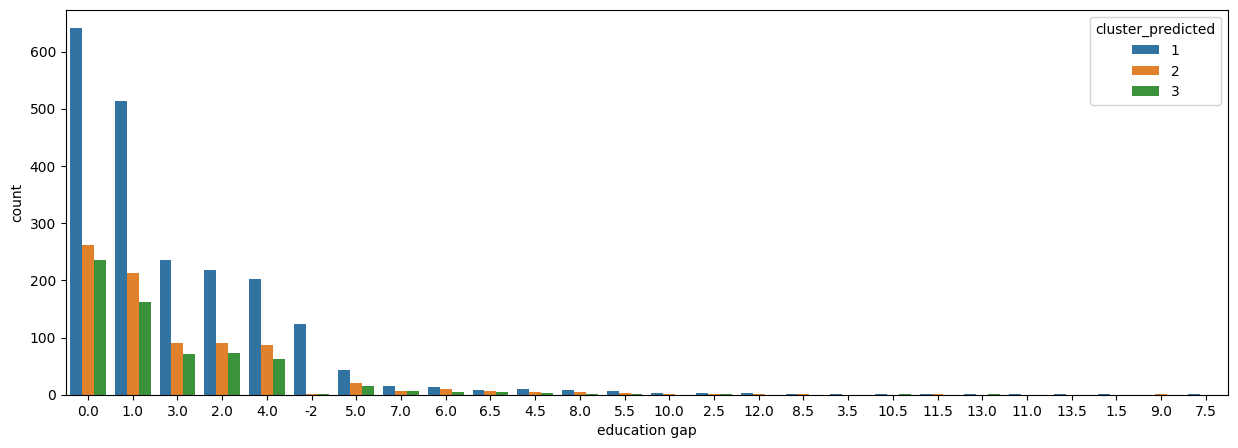

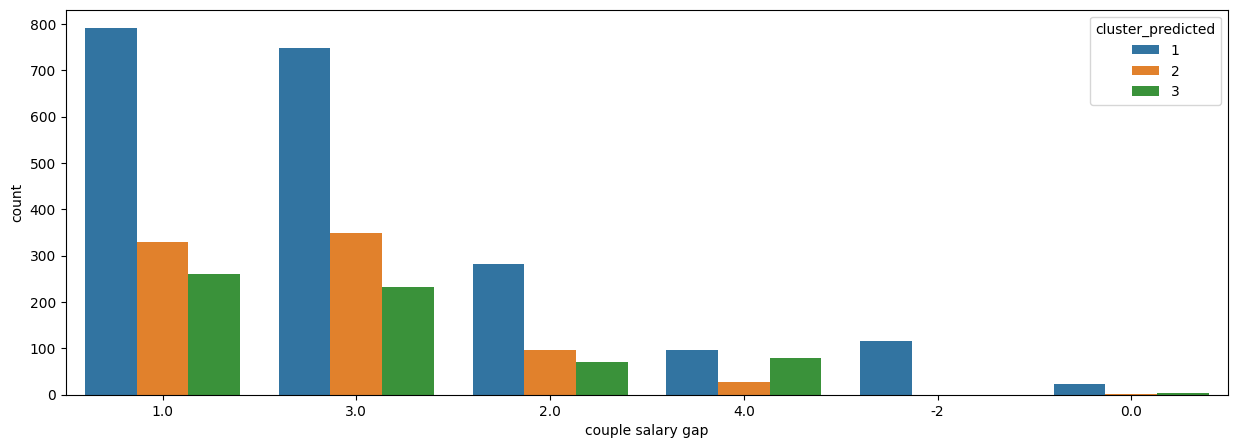

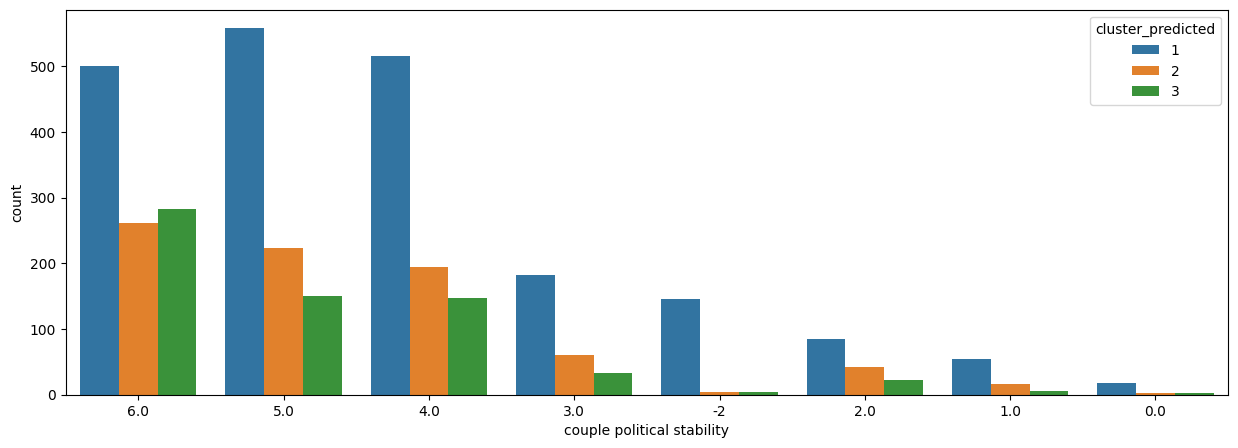

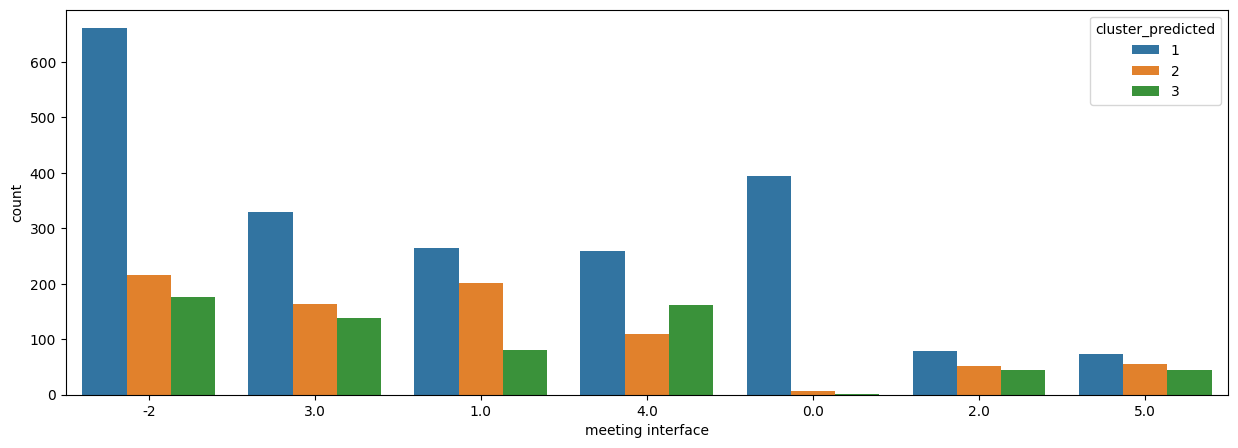

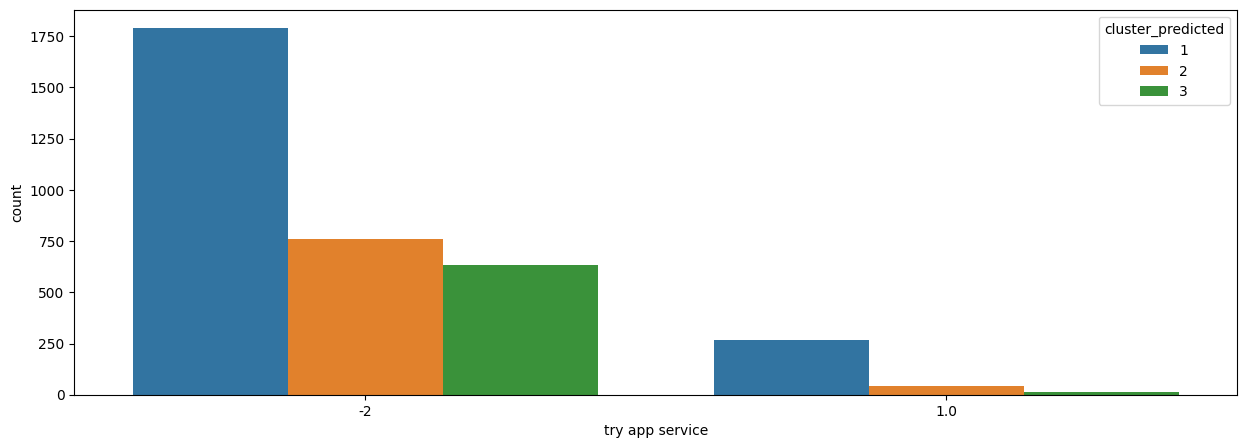

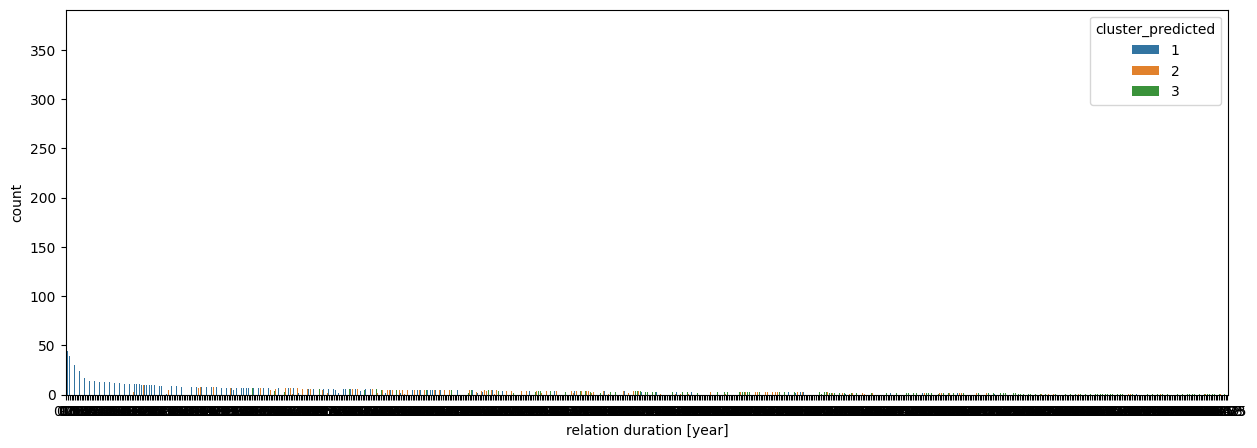

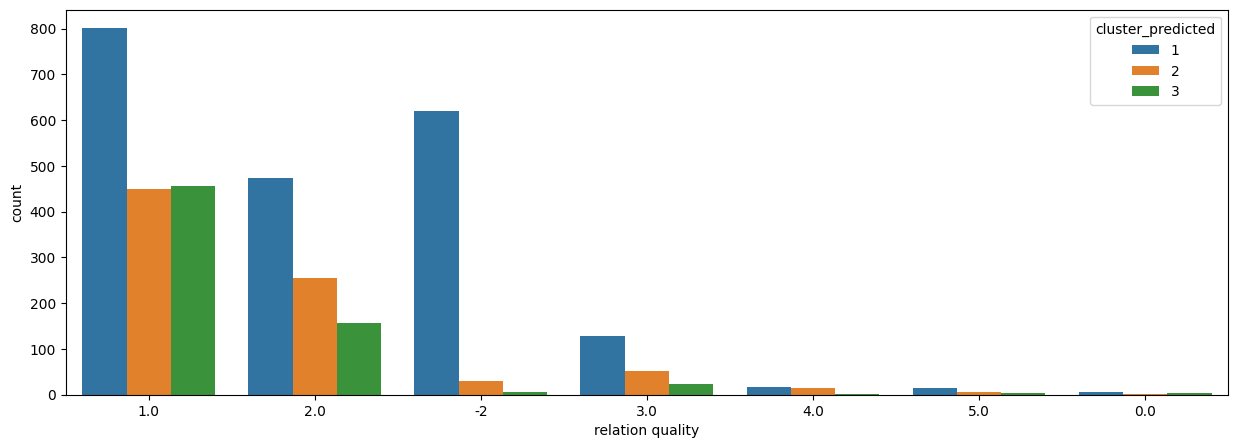

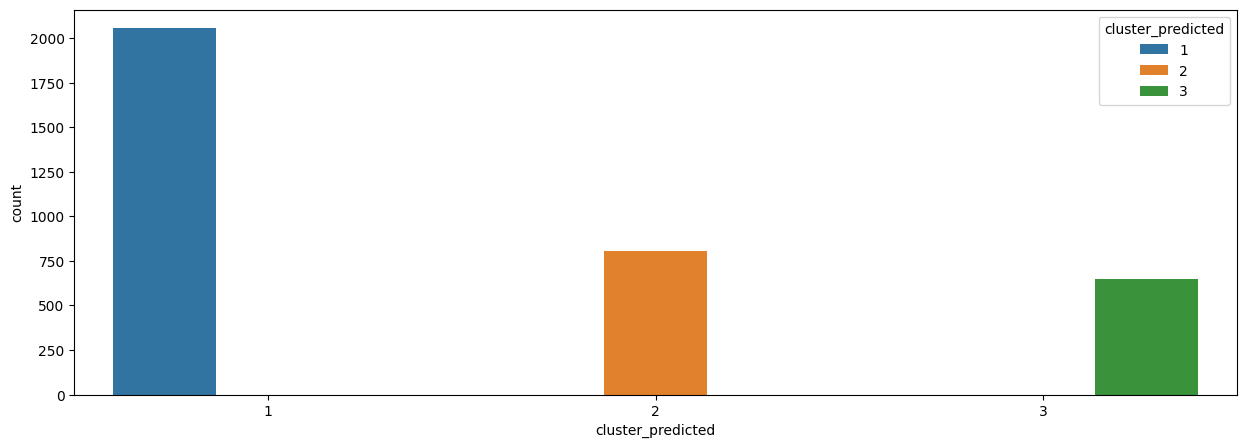

In [19]:
for i in range_columns:

    plt.subplots(figsize = (15,5))
    sns.countplot(x=combinedDf[i],order=combinedDf[i].value_counts().index,hue=combinedDf['cluster_predicted'])
    plt.show()

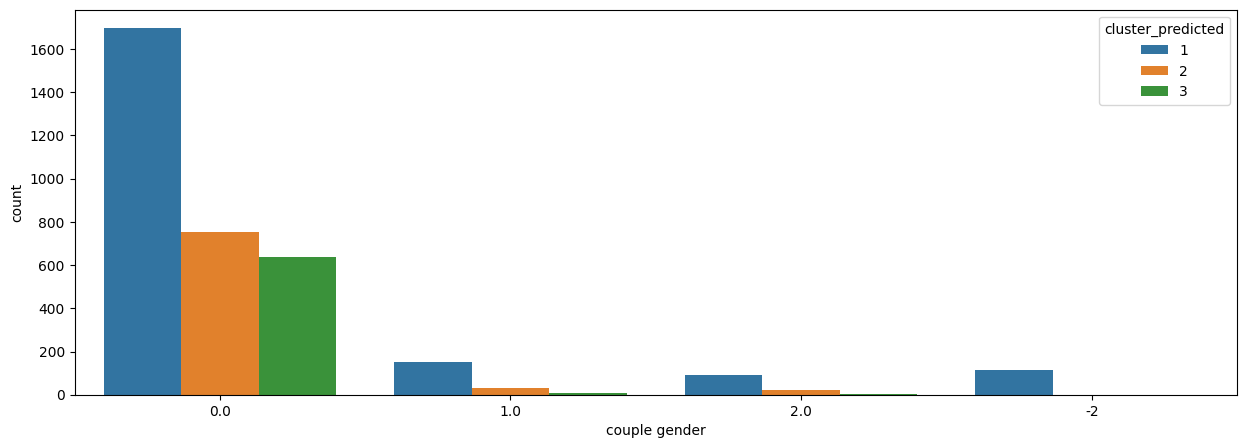

In [17]:
import seaborn as sns

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['couple gender'],order=combinedDf['couple gender'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

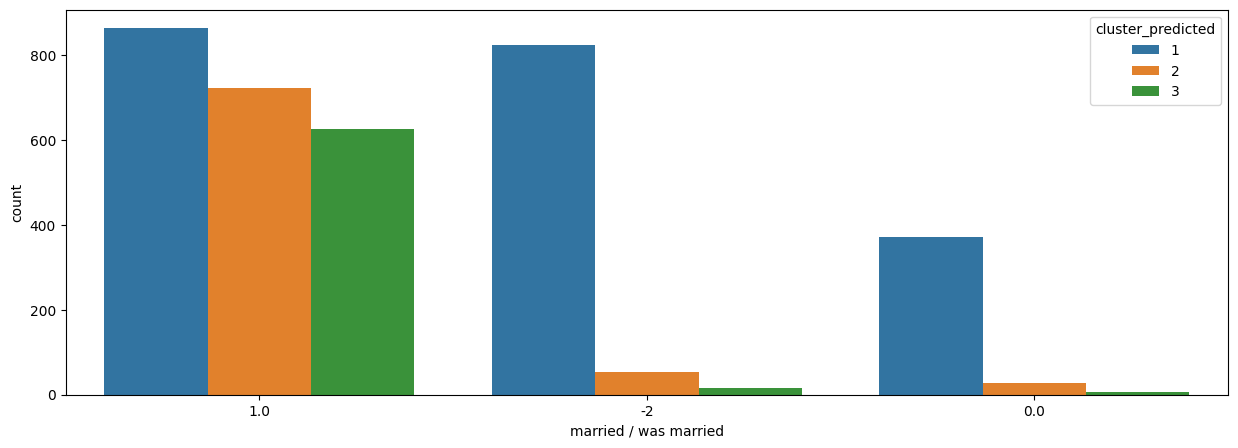

In [13]:
import seaborn as sns

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['married / was married'],order=combinedDf['married / was married'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

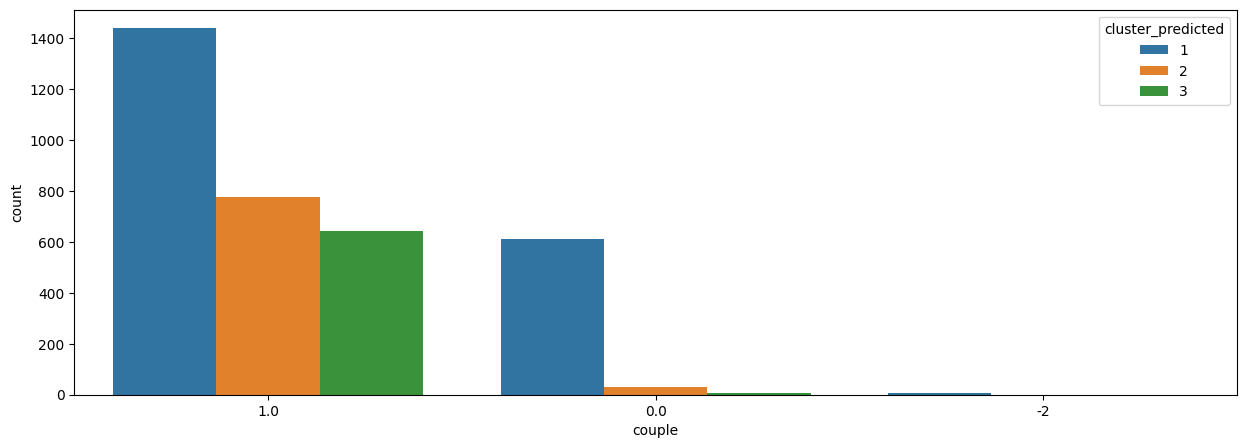

In [14]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['couple'],order=combinedDf['couple'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

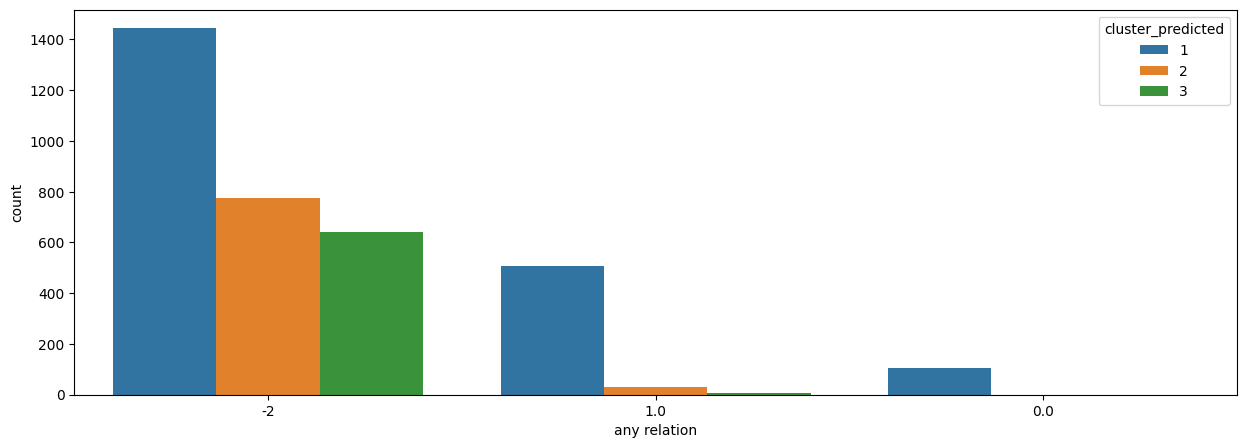

In [15]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['any relation'],order=combinedDf['any relation'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

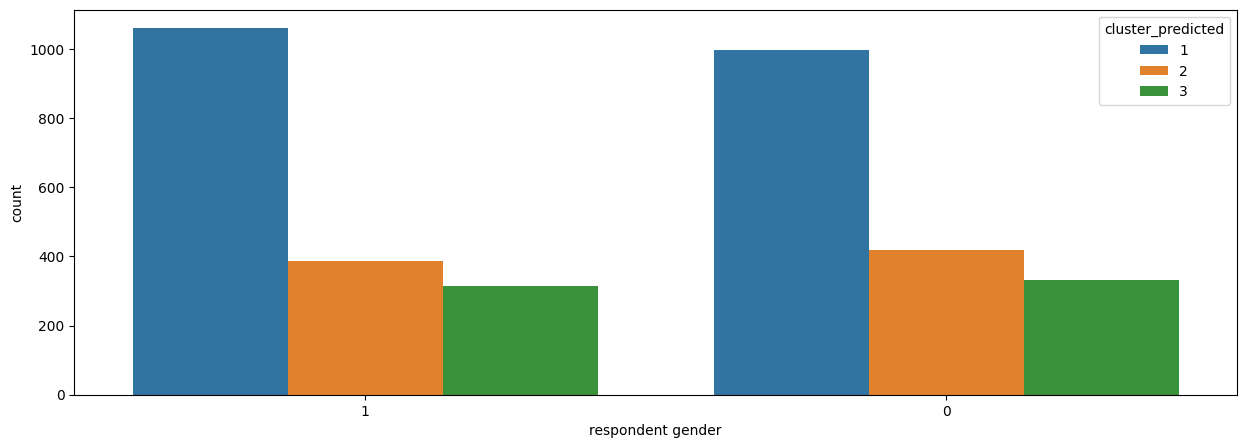

In [16]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['respondent gender'],order=combinedDf['respondent gender'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [17]:
combinedDf['ppage']

0       30
1       55
2       47
3       28
4       59
        ..
3505    27
3506    24
3507    41
3508    32
3509    43
Name: ppage, Length: 3510, dtype: object

In [18]:
import pandas as pd

combinedDf['ppage']=combinedDf['ppage'].astype(float)
for age in combinedDf['ppage']:
    combinedDf['age_bin']=combinedDf['ppage']//33


# print(combinedDf['ppage'])
print(combinedDf['age_bin'])
combinedDf.dtypes



0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
3505    0.0
3506    0.0
3507    1.0
3508    0.0
3509    1.0
Name: age_bin, Length: 3510, dtype: float64


S1                    object
Q10                   object
Q12                   object
w6_q32                object
ppage                float64
cluster_predicted      int32
age_bin              float64
dtype: object

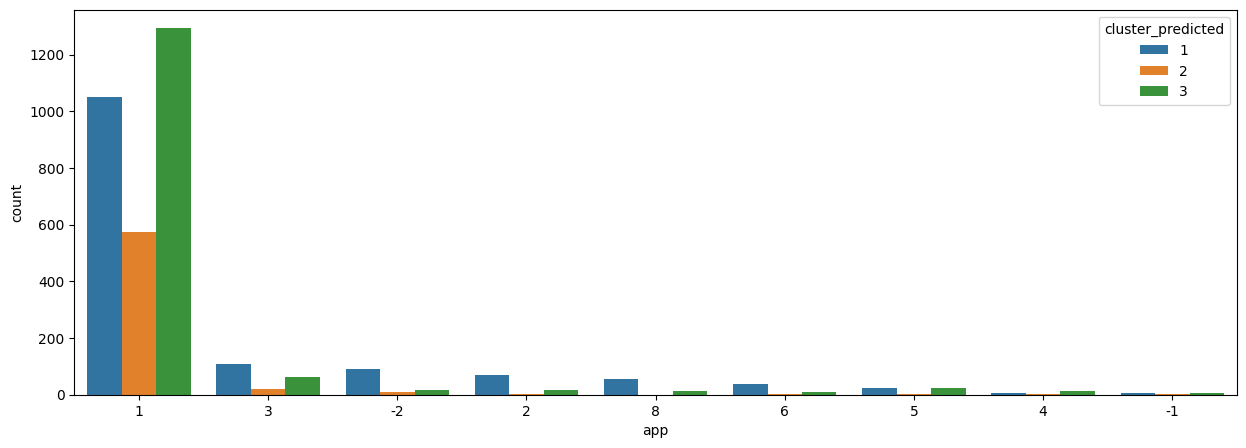

In [23]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['app'],order=combinedDf['app'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

check feature importance

In [24]:
combinedDf['Q10'] = combinedDf['Q10'].apply(lambda x: pd.factorize(x)[0])

print(combinedDf['Q10'])

TypeError: 'int' object is not iterable

In [21]:

X=combinedDf.loc[:,range_columns]



y=combinedDf.loc[:,'cluster_predicted']
y=y.values 
print(X.head())
print(y)

  married / was married couple any relation respondent gender couple gender  \
0                   0.0    0.0          1.0                 0           1.0   
1                   1.0    1.0           -2                 1           0.0   
2                   1.0    1.0           -2                 0           0.0   
3                   0.0    0.0          1.0                 1           2.0   
4                   1.0    1.0           -2                 1           0.0   

   interracial couple respondent age partner age education gap  \
0                  -2              2         1.0           2.0   
1                  -2              4         4.0           0.0   
2                  -2              3         3.0           3.0   
3                  -2              1         1.0           0.0   
4                  -2              4         4.0           0.0   

  couple salary gap couple political stability meeting interface  \
0               1.0                        2.0              

numeric

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


rf=RandomForestClassifier()

rf.fit(X_train,y_train)
print(accuracy_score(y_test, rf.predict(X_test)))


1.0


In [26]:
print(rf.feature_importances_)


[1.76601431e-02 7.99923137e-03 6.86507302e-03 5.42603207e-04
 1.58498244e-03 0.00000000e+00 4.71110807e-02 6.75319666e-02
 1.78581574e-03 2.17805003e-03 1.83475119e-03 6.61216746e-03
 3.07708540e-04 3.35493649e-01 5.67092682e-03 4.96821850e-01]
